# Measure GRACE performance on identified objects:

### All metrics here are **exact**, i.e measure similarity between two graphs formed of identical node count which have the same positions. The only thing that differs between the graphs is the edges and object membership / individual identities. 

*Note:* The rationale behind evaluating the per-node and per-edge metrics at this stage is that the optimisation step can (and most likely will) change the identities of the individual nodes / edges when looking for a globally optimal solution. For example, a single node be predicted (by the GCN / classification method of choice) to have a high probability of being considered a real node (true positive, TP), but if such node is surrounded by no other plausible nodes or forms no acceptable edges, it has a high likelihood to be considered a fake node (true negative, TN) in favour of the global optimisation. This is why evaluation of the node- & edge-specific metrics is vital to observe the changes made to the graph components as a result of the optimisation step.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.metrics import (
    confusion_matrix, 
    precision_recall_fscore_support,
    jaccard_score,
)


In [2]:
from grace.base import GraphAttrs
from grace.models.optimiser import optimise_graph

from grace.io.image_dataset import generate_ground_truth_graph

from grace.simulator.simulate_graph import (
    random_graph, 
    update_graph_with_dummy_predictions, 
    imply_annotations_from_dummy_predictions
)

from grace.evaluation.visualisation import (
    plot_simple_graph,
    plot_connected_components
)

from grace.evaluation.metrics import compute_metrics

/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Generate a random graph, update dummy labels & generate GT graph:

In [3]:
def generate_random_optimised_and_GT_graphs():
    G = random_graph(n_motifs=5, density=0.05)
    node_conf, edge_conf = 0.5, 0.1
    update_graph_with_dummy_predictions(
        G, 
        node_confidence=node_conf, 
        edge_confidence=edge_conf
    )
    imply_annotations_from_dummy_predictions(G)
    true_graph = generate_ground_truth_graph(G)
    pred_graph = optimise_graph(G)

    return G, pred_graph, true_graph

In [4]:
synthesize = True
counter = 0

while synthesize:
    counter += 1
    print (f"Synthesizing erroneous graph: iter = {counter}")

    G, pred_graph, true_graph = generate_random_optimised_and_GT_graphs()
    node_con = pred_graph.number_of_nodes() == true_graph.number_of_nodes()
    edge_con = pred_graph.number_of_edges() != true_graph.number_of_edges()
    
    if node_con and edge_con:
        synthesize = False


Synthesizing erroneous graph: iter = 1
Synthesizing erroneous graph: iter = 2
Synthesizing erroneous graph: iter = 3
Synthesizing erroneous graph: iter = 4
Synthesizing erroneous graph: iter = 5
Synthesizing erroneous graph: iter = 6


# Evaluate:

Object detection metrics | Nodes
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1 Score  : 1.0000
Object detection metrics | Edges
Accuracy  : 0.9979
Precision : 1.0000
Recall    : 0.9792
F1 Score  : 0.9895
Intersection over Union
Semantic        : 1.0000
Instance [mean] : 0.9091
Instance [std]  : 0.2203


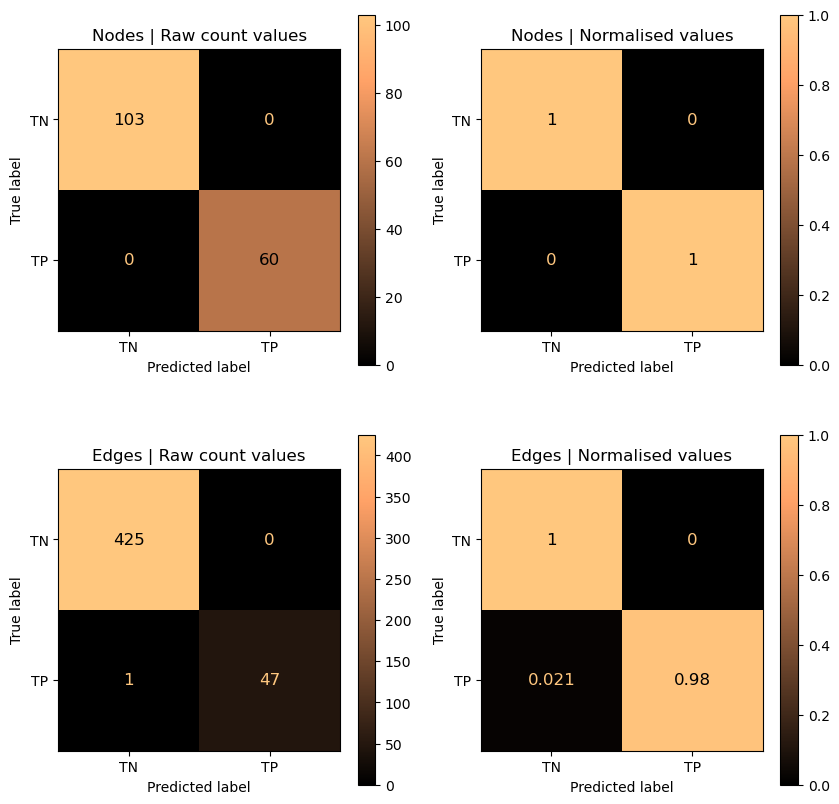

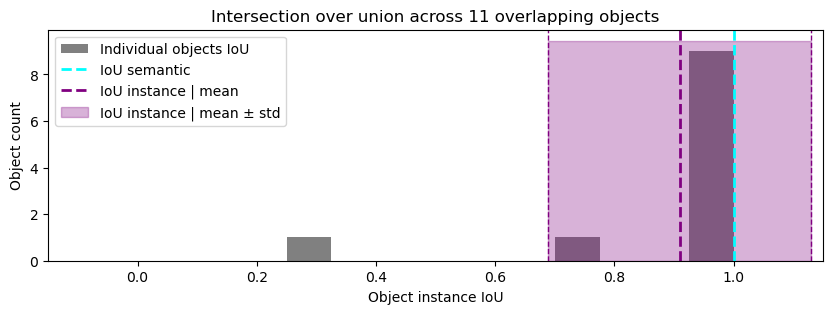

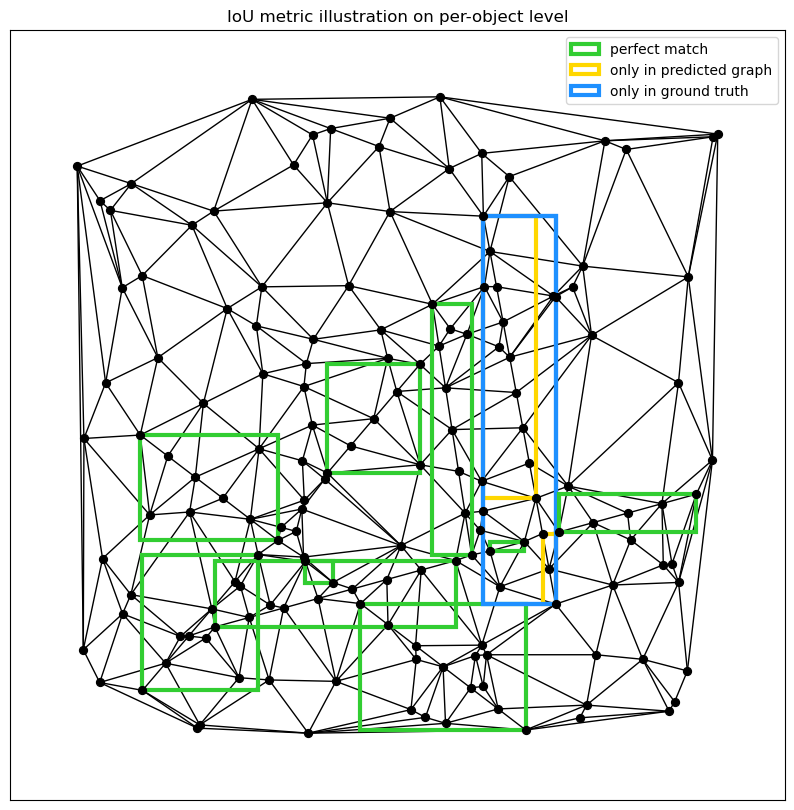

In [5]:
compute_metrics(G=G, pred_graph=pred_graph, true_graph=true_graph)

### Done!